In [2]:
pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from yellowbrick.cluster import KElbowVisualizer

C:\Users\buchh\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\buchh\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\buchh\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
#read in data
data_raw = pd.read_csv('data-final.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  326479


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [4]:
#drop null
data.dropna(inplace=True)
df = data.drop('country', axis=1).copy()

In [5]:
# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [6]:
#Grouping
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

In [7]:
pos_questions = [ # positive questions adding to the trait.
    'EXT1','EXT3','EXT5','EXT7','EXT9',
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',
]
neg_questions = [ # negative (negating) questions subtracting from the trait.
    'EXT2','EXT4','EXT6','EXT8','EXT10',
    'AGR1','AGR3','AGR5','AGR7',
    'CSN2','CSN4','CSN6','CSN8',
    'OPN2','OPN4','OPN6',
]

df[pos_questions] = df[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})
df[neg_questions] = df[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})
cols = pos_questions + neg_questions
df = df[sorted(cols)]

In [8]:
df.head()

,AGR1,AGR10,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,CSN1,CSN10,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,EXT1,EXT10,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,OPN1,OPN10,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9
0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0
1,2.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,-2.0,-2.0,0.0,-1.0,0.0,0.0,-1.0,-2.0,-2.0,-2.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,-1.0,2.0
2,2.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,0.0,0.0,1.0,1.0,1.0,-1.0,-2.0,0.0,1.0,-1.0,0.0,1.0,-2.0,0.0,-1.0,2.0,1.0,2.0,-1.0,2.0,1.0,1.0,2.0,0.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,-1.0,1.0,-1.0,1.0,-1.0,-2.0,1.0,-1.0,0.0,-2.0,-1.0,-1.0,1.0,-1.0,0.0,1.0,1.0,-1.0,-1.0,-2.0,1.0,0.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0
4,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,-1.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0


In [9]:
traits = ['EXT', 'AGR', 'CSN', 'OPN']
trait_labels = ['Extroversion', 'Agreeableness', 'Conscientiousness', 'Openness']

for trait in traits:
    trait_cols = sorted([col for col in df.columns if trait in col and '_E' not in col])
    df[trait] = df[trait_cols].sum(axis=1)

df = df.rename(columns={k:v for k,v in zip(traits, trait_labels)})
df[trait_labels].tail()

,Extroversion,Agreeableness,Conscientiousness,Openness
326473,-1.0,3.0,-2.0,-2.0
326474,-6.0,15.0,12.0,-6.0
326475,-2.0,14.0,9.0,3.0
326476,-9.0,2.0,6.0,4.0
326477,6.0,7.0,5.0,16.0


In [10]:
#defining a distribution function
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Open Personality


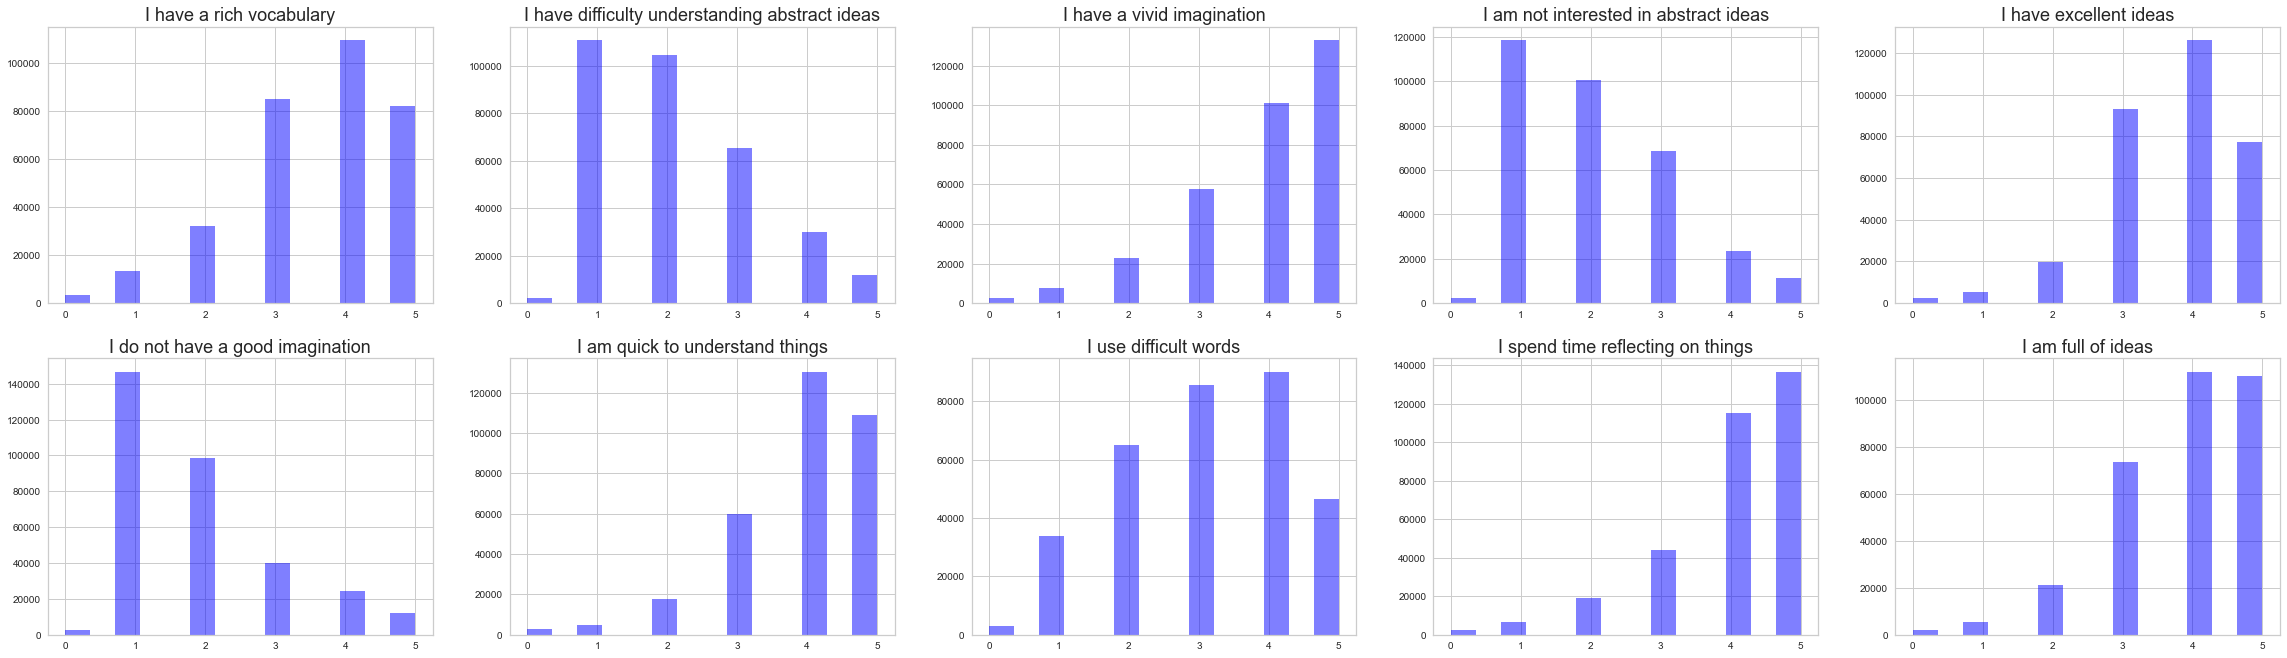

In [11]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

Q&As Related to Conscientious Personality


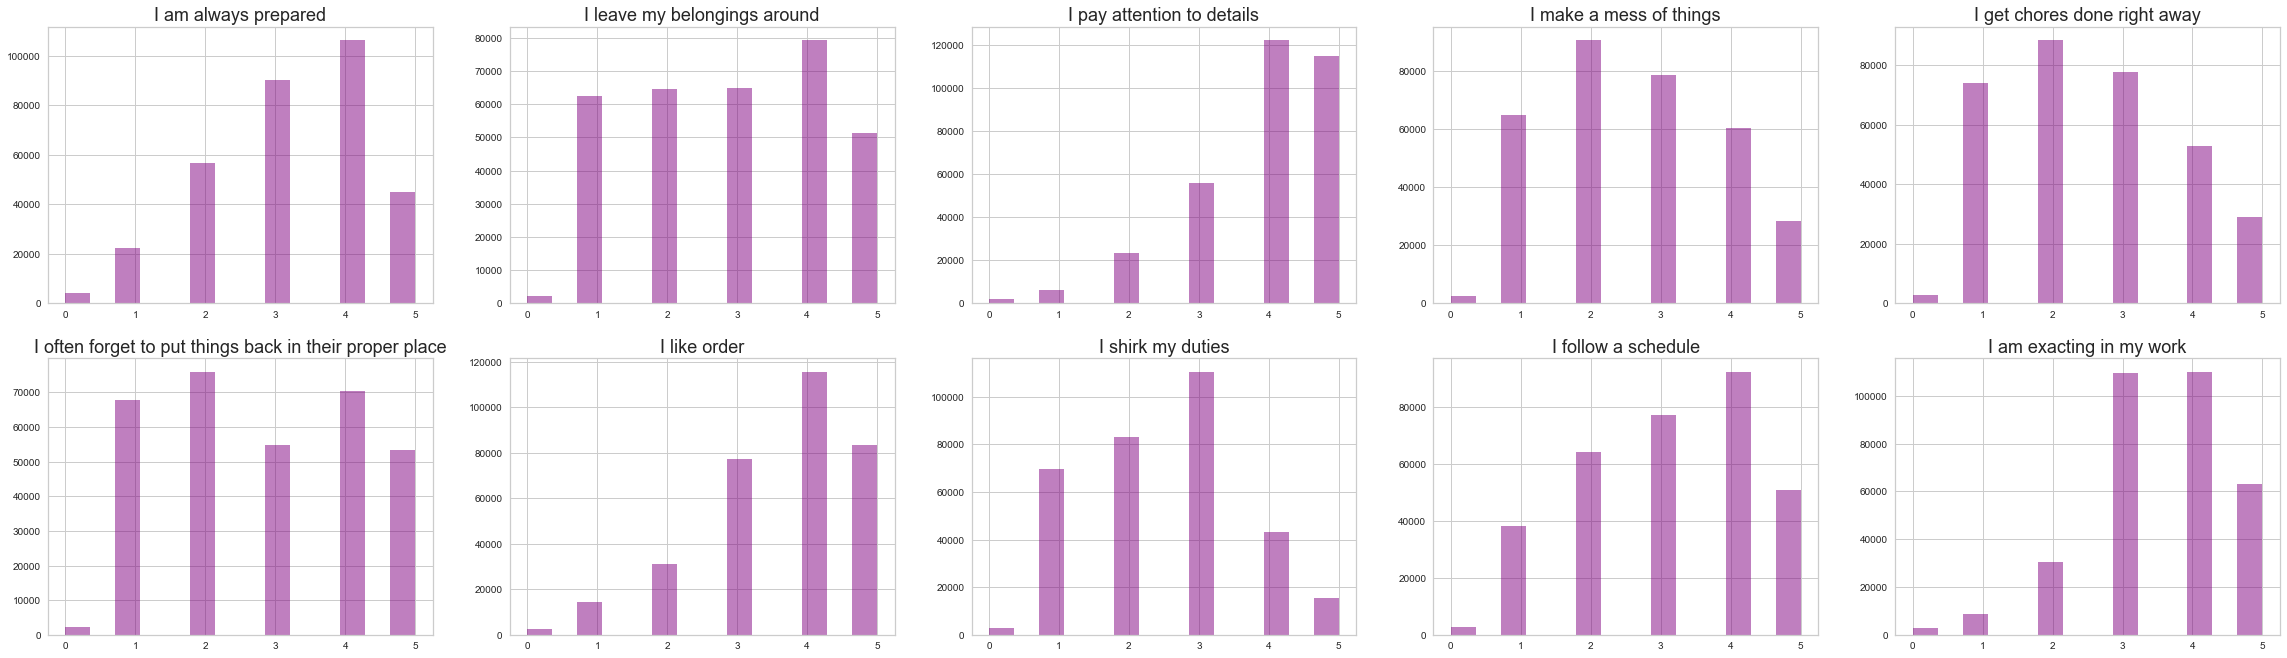

In [12]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

In [13]:
from sklearn.preprocessing import MinMaxScaler

columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

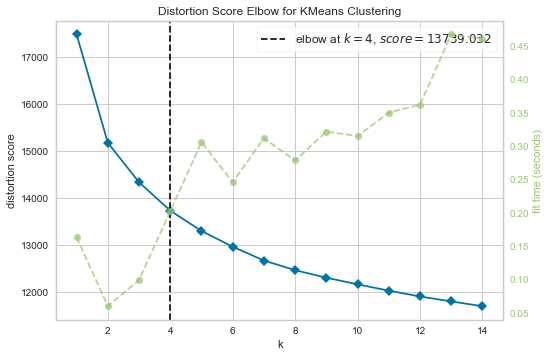

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,15))
visualizer.fit(df_sample)
visualizer.poof();

In [16]:
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(df)

In [17]:
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df['Clusters'] = predictions
df.head()

,AGR1,AGR10,AGR2,AGR3,AGR4,...,Extroversion,Agreeableness,Conscientiousness,Openness,Clusters
0,0.75,0.75,1.00,0.75,0.75,...,0.900,0.725,0.550,0.875,3
1,1.00,0.50,0.75,1.00,1.00,...,0.250,0.850,0.675,0.625,0
2,1.00,0.50,0.75,1.00,0.75,...,0.375,0.800,0.600,0.775,0
3,0.75,0.75,0.75,0.50,0.75,...,0.400,0.700,0.375,0.725,3
4,1.00,0.50,1.00,1.00,1.00,...,0.475,0.900,0.950,0.950,1


In [18]:
df.Clusters.value_counts()

0    89220
3    81282
1    80673
2    73497
Name: Clusters, dtype: int64

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,1.839942,-1.105624,3
1,-1.790243,0.155030,0
2,-1.562965,-0.120110,0
3,1.517255,0.528708,3
4,-0.826488,-0.999668,1


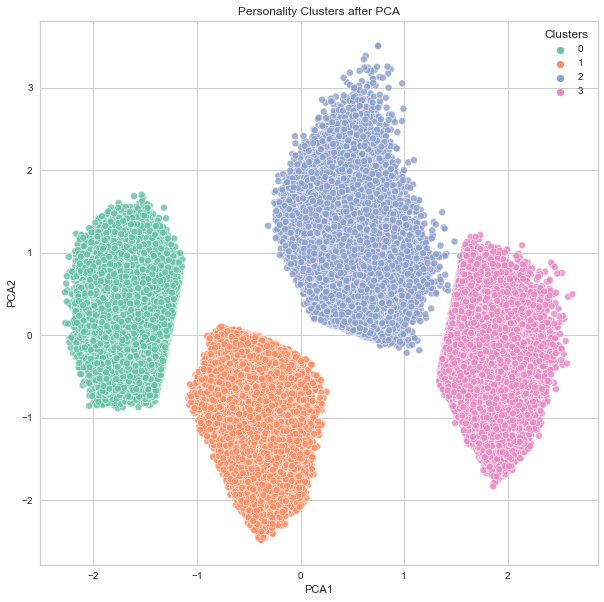

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');